In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline

In [2]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/regression/diamond_pricing.csv'
df= pd.read_csv(url)
df

,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089
2,123,9715,2083.132087
3,182,2073,2236.340285
4,133,6400,1903.323339
...,...,...,...
995,90,15039,1633.608018
996,49,10592,2316.189728
997,42,18435,1189.359047
998,10,13675,2922.682785


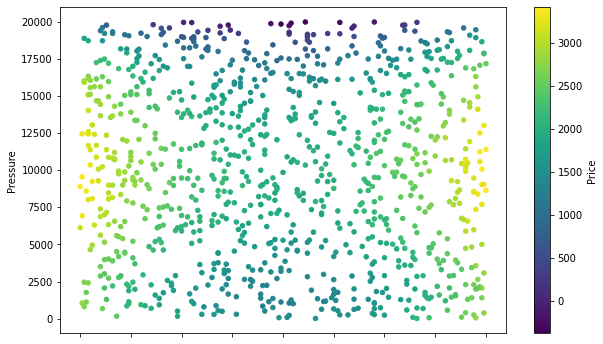

In [3]:
df.plot(kind = 'scatter', x='Paleonium', y='Pressure', c='Price', cmap='viridis', figsize=(10, 6))
plt.show()

In [4]:
df.corr()                        # its show good and bad values

,Paleonium,Pressure,Price
Paleonium,1.000000,-0.046403,-0.018509
Pressure,-0.046403,1.000000,-0.304064
Price,-0.018509,-0.304064,1.000000


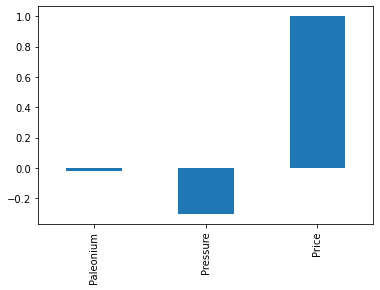

In [5]:
df.corrwith(df['Price']).plot(kind='bar')
plt.show()

#### simple implementation

In [6]:
# split data
X = df.drop('Price', axis=1).values
y = df['Price'].values

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=.25, random_state=0)

In [8]:
model = make_pipeline(StandardScaler(),DecisionTreeRegressor())

In [9]:
model.fit(xtrain, ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [10]:
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('decisiontreeregressor', DecisionTreeRegressor())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'decisiontreeregressor': DecisionTreeRegressor(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'decisiontreeregressor__ccp_alpha': 0.0,
 'decisiontreeregressor__criterion': 'squared_error',
 'decisiontreeregressor__max_depth': None,
 'decisiontreeregressor__max_features': None,
 'decisiontreeregressor__max_leaf_nodes': None,
 'decisiontreeregressor__min_impurity_decrease': 0.0,
 'decisiontreeregressor__min_samples_leaf': 1,
 'decisiontreeregressor__min_samples_split': 2,
 'decisiontreeregressor__min_weight_fraction_leaf': 0.0,
 'decisiontreeregressor__random_state': None,
 'decisiontreeregressor__splitter': 'best'}

In [11]:
print("Testing Metrics")
ypred = model.predict(xtest)
print(f'score: {r2_score(ytest, ypred):.4}')
print(f'mse: {mean_squared_error(ytest, ypred):.4}')
print(f'mae : {mean_absolute_error(ytest, ypred):.4}')

Testing Metrics
score: 0.9605
mse: 1.674e+04
mae : 98.16


In [12]:
print("Training Metrics")
ypred = model.predict(xtrain)
print(f'score : {r2_score(ytrain, ypred):.4}')
print(f'mse : {mean_squared_error(ytrain, ypred):.4}')                            # .4 means round off
print(f'mae : {mean_absolute_error(ytrain, ypred):.4}')

Training Metrics
score : 1.0
mse : 0.0
mae : 0.0


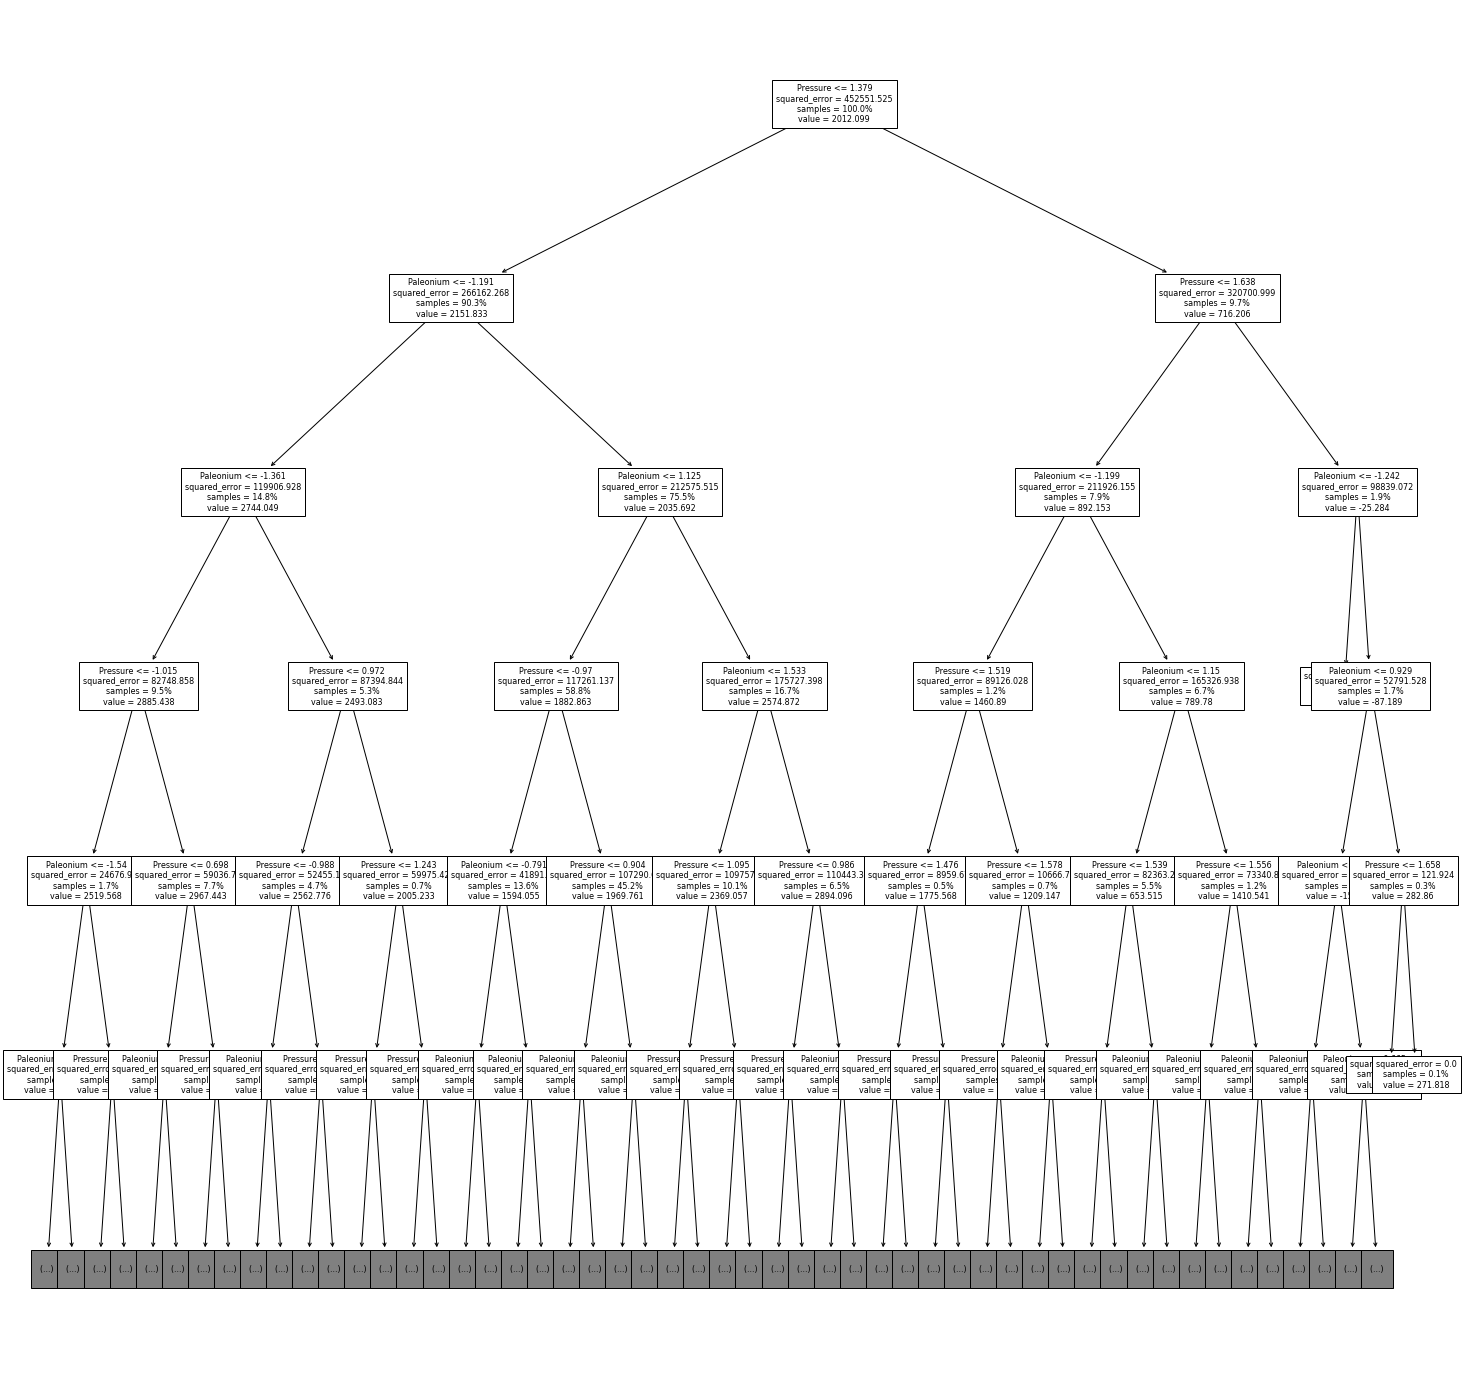

In [13]:
plt.figure(figsize=(25,25))
plot_tree(model.get_params()['decisiontreeregressor'],
              max_depth=5,
              feature_names=['Paleonium', 'Pressure'],
              fontsize=8, proportion=True)
plt.show()              

#### Cross validate

In [14]:
# cross to help actuall accuray
ss = ShuffleSplit(n_splits=10, test_size=.25)
model = make_pipeline(StandardScaler(),DecisionTreeRegressor(max_depth=15))

In [15]:
result = cross_validate(model, X, y, cv=ss, 
                        scoring=['neg_mean_absolute_error' , 'r2'],
                         return_train_score=True, 
                         return_estimator=True)
result = pd.DataFrame(result)
result['test_error']= -result['test_neg_mean_absolute_error']
result['train_error'] = -result['train_neg_mean_absolute_error']
result                         

,fit_time,score_time,estimator,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_r2,train_r2,test_error,train_error
0,0.004501,0.004066,"(StandardScaler(), DecisionTreeRegressor(max_d...",-105.644586,-5.846487,0.956324,0.999280,105.644586,5.846487
1,0.003515,0.001454,"(StandardScaler(), DecisionTreeRegressor(max_d...",-89.121009,-7.062457,0.971818,0.999046,89.121009,7.062457
2,0.004460,0.002494,"(StandardScaler(), DecisionTreeRegressor(max_d...",-102.843316,-5.140692,0.954610,0.999374,102.843316,5.140692
3,0.003999,0.002001,"(StandardScaler(), DecisionTreeRegressor(max_d...",-102.570240,-5.218035,0.956940,0.999335,102.570240,5.218035
4,0.006000,0.001500,"(StandardScaler(), DecisionTreeRegressor(max_d...",-95.889496,-5.670012,0.966798,0.999285,95.889496,5.670012
5,0.004002,0.005501,"(StandardScaler(), DecisionTreeRegressor(max_d...",-102.178642,-5.892437,0.954393,0.999302,102.178642,5.892437
6,0.003499,0.001499,"(StandardScaler(), DecisionTreeRegressor(max_d...",-101.388408,-6.026379,0.941763,0.999287,101.388408,6.026379
7,0.005028,0.001014,"(StandardScaler(), DecisionTreeRegressor(max_d...",-85.771457,-5.074943,0.968602,0.999423,85.771457,5.074943
8,0.002485,0.001018,"(StandardScaler(), DecisionTreeRegressor(max_d...",-98.654482,-6.513913,0.965024,0.999100,98.654482,6.513913
9,0.002459,0.007139,"(StandardScaler(), DecisionTreeRegressor(max_d...",-102.130209,-5.593368,0.957866,0.999281,102.130209,5.593368


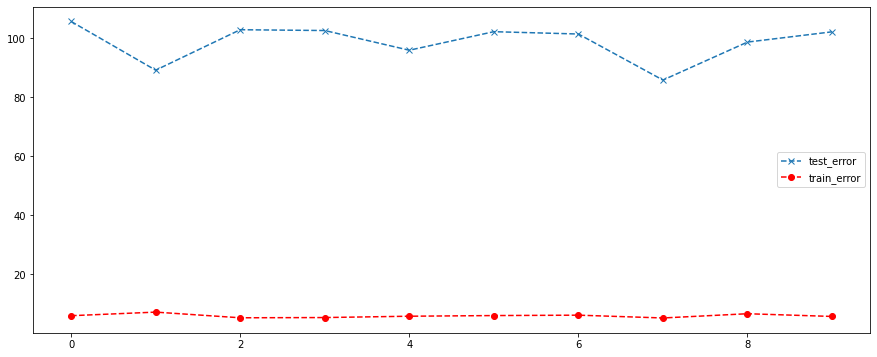

In [16]:
fig, ax = plt.subplots(figsize = (15, 6))
result.plot(kind = 'line', y='test_error', ax=ax, style= '--x')
result.plot(kind = 'line', y = 'train_error', ax = ax, style = 'r--o')
plt.show()

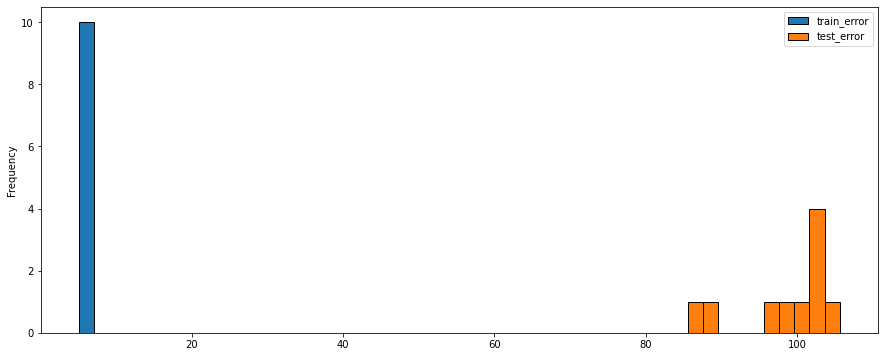

In [17]:
fig, ax = plt.subplots(figsize = (15, 6))                                   # overfitting 
result[['train_error', 'test_error']].plot(kind='hist', bins = 50, ax=ax, edgecolor='black')
plt.show()

In [18]:
from sklearn.model_selection import validation_curve

In [19]:
max_dept_options = [5, 10, 15, 25, 50, 100]
train_scores, test_scores = validation_curve(model, X, y,
                            param_name='decisiontreeregressor__max_depth',
                            param_range= max_dept_options,
                            cv =ss,
                            scoring= 'neg_mean_absolute_error', 
                            n_jobs=2)
train_errors, test_errors = -train_scores, -test_scores                           

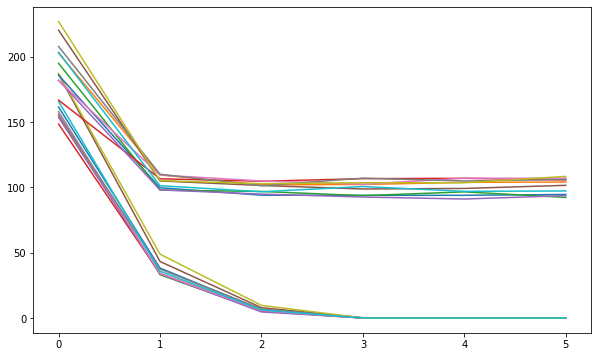

In [20]:
plt.figure(figsize= (10, 6))
plt.plot(train_errors)
plt.plot(test_errors)
plt.show()

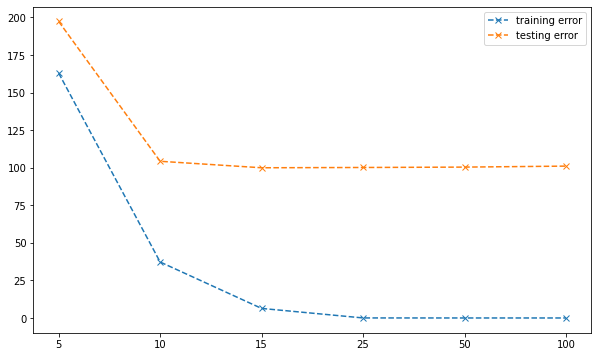

In [21]:
plt.figure(figsize= (10, 6))
plt.plot(train_errors.mean(axis=1),'--x' ,label= 'training error')
plt.plot(test_errors.mean(axis=1),'--x', label = 'testing error')
plt.xticks([0,1,2, 3, 4, 5],max_dept_options)
plt.legend()
plt.show()